In [1]:
# For statistics and visualization.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For addressing files and missing values.
import os
import missingno as msno
import janitor

# For linear models.
import statsmodels.api as sm
from utils import linmodules as lm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Preparing Dataset
### 1. Accessing files and quick exploration data analysis.

In [2]:
path = "../Datasets/renewable"
to_analyze = os.path.join(path, "modern-renewable-prod.csv")
os.listdir(path)

['share-electricity-wind.csv',
 'wind-share-energy.csv',
 'biofuel-production.csv',
 'installed-solar-PV-capacity.csv',
 'installed-geothermal-capacity.csv',
 'modern-renewable-prod.csv',
 'solar-share-energy.csv',
 'share-electricity-renewables.csv',
 'hydro-share-energy.csv',
 'share-electricity-hydro.csv',
 'renewable-share-energy.csv',
 'share-electricity-solar.csv',
 'solar-energy-consumption.csv',
 'modern-renewable-energy-consumption.csv',
 'hydropower-consumption.csv',
 'wind-generation.csv',
 'cumulative-installed-wind-energy-capacity-gigawatts.csv']

In [3]:
mprod_df = pd.read_csv(filepath_or_buffer=to_analyze, header=0, sep=",")
mprod_df.head() # Modern renewable energy production.

,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Electricity from other renewables including bioenergy (TWh)
0,Afghanistan,AFG,2000,0.0,0.31,0.0,0.0
1,Afghanistan,AFG,2001,0.0,0.50,0.0,0.0
2,Afghanistan,AFG,2002,0.0,0.56,0.0,0.0
3,Afghanistan,AFG,2003,0.0,0.63,0.0,0.0
4,Afghanistan,AFG,2004,0.0,0.56,0.0,0.0


In [4]:
mprod_df.columns

Index(['Entity', 'Code', 'Year', 'Electricity from wind (TWh)',
       'Electricity from hydro (TWh)', 'Electricity from solar (TWh)',
       'Electricity from other renewables including bioenergy (TWh)'],
      dtype='object')

In [5]:
mprod_df.shape

(7995, 7)

In [6]:
mprod_df.dtypes

Entity                                                          object
Code                                                            object
Year                                                             int64
Electricity from wind (TWh)                                    float64
Electricity from hydro (TWh)                                   float64
Electricity from solar (TWh)                                   float64
Electricity from other renewables including bioenergy (TWh)    float64
dtype: object

In [7]:
mprod_df.describe()

,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Electricity from other renewables including bioenergy (TWh)
count,7995.000000,7994.000000,7994.000000,7995.000000,7989.000000
mean,1999.745466,11.135878,100.810761,4.011584,9.987586
std,15.497815,79.115512,354.595200,36.179362,46.165962
min,1965.000000,0.000000,0.000000,0.000000,0.000000
25%,1989.000000,0.000000,0.080000,0.000000,0.000000
50%,2004.000000,0.000000,2.820000,0.000000,0.010000
75%,2012.000000,0.020000,19.059250,0.010000,0.867000
max,2021.000000,1813.700000,4311.810000,1023.100000,749.990000


To handle with more easiness our following descriptive analysis, columns names are snake cased:

In [8]:
mprod_df = mprod_df.clean_names(case_type="snake")
mprod_df.head(2)

,entity,code,year,electricity_from_wind_t_wh_,electricity_from_hydro_t_wh_,electricity_from_solar_t_wh_,electricity_from_other_renewables_including_bioenergy_t_wh_
0,Afghanistan,AFG,2000,0.0,0.31,0.0,0.0
1,Afghanistan,AFG,2001,0.0,0.50,0.0,0.0


### 2. Inspecting missing values.

In [9]:
mprod_df.isna().sum()

entity                                                           0
code                                                           957
year                                                             0
electricity_from_wind_t_wh_                                      1
electricity_from_hydro_t_wh_                                     1
electricity_from_solar_t_wh_                                     0
electricity_from_other_renewables_including_bioenergy_t_wh_      6
dtype: int64

In [10]:
%run "./utils/pandas-missing-extension.ipynb"

In [11]:
mprod_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,entity,0,7995,0.000000
1,code,957,7995,11.969981
2,year,0,7995,0.000000
3,electricity_from_wind_t_wh_,1,7995,0.012508
4,electricity_from_hydro_t_wh_,1,7995,0.012508
5,electricity_from_solar_t_wh_,0,7995,0.000000
6,electricity_from_other_renewables_including_bi...,6,7995,0.075047


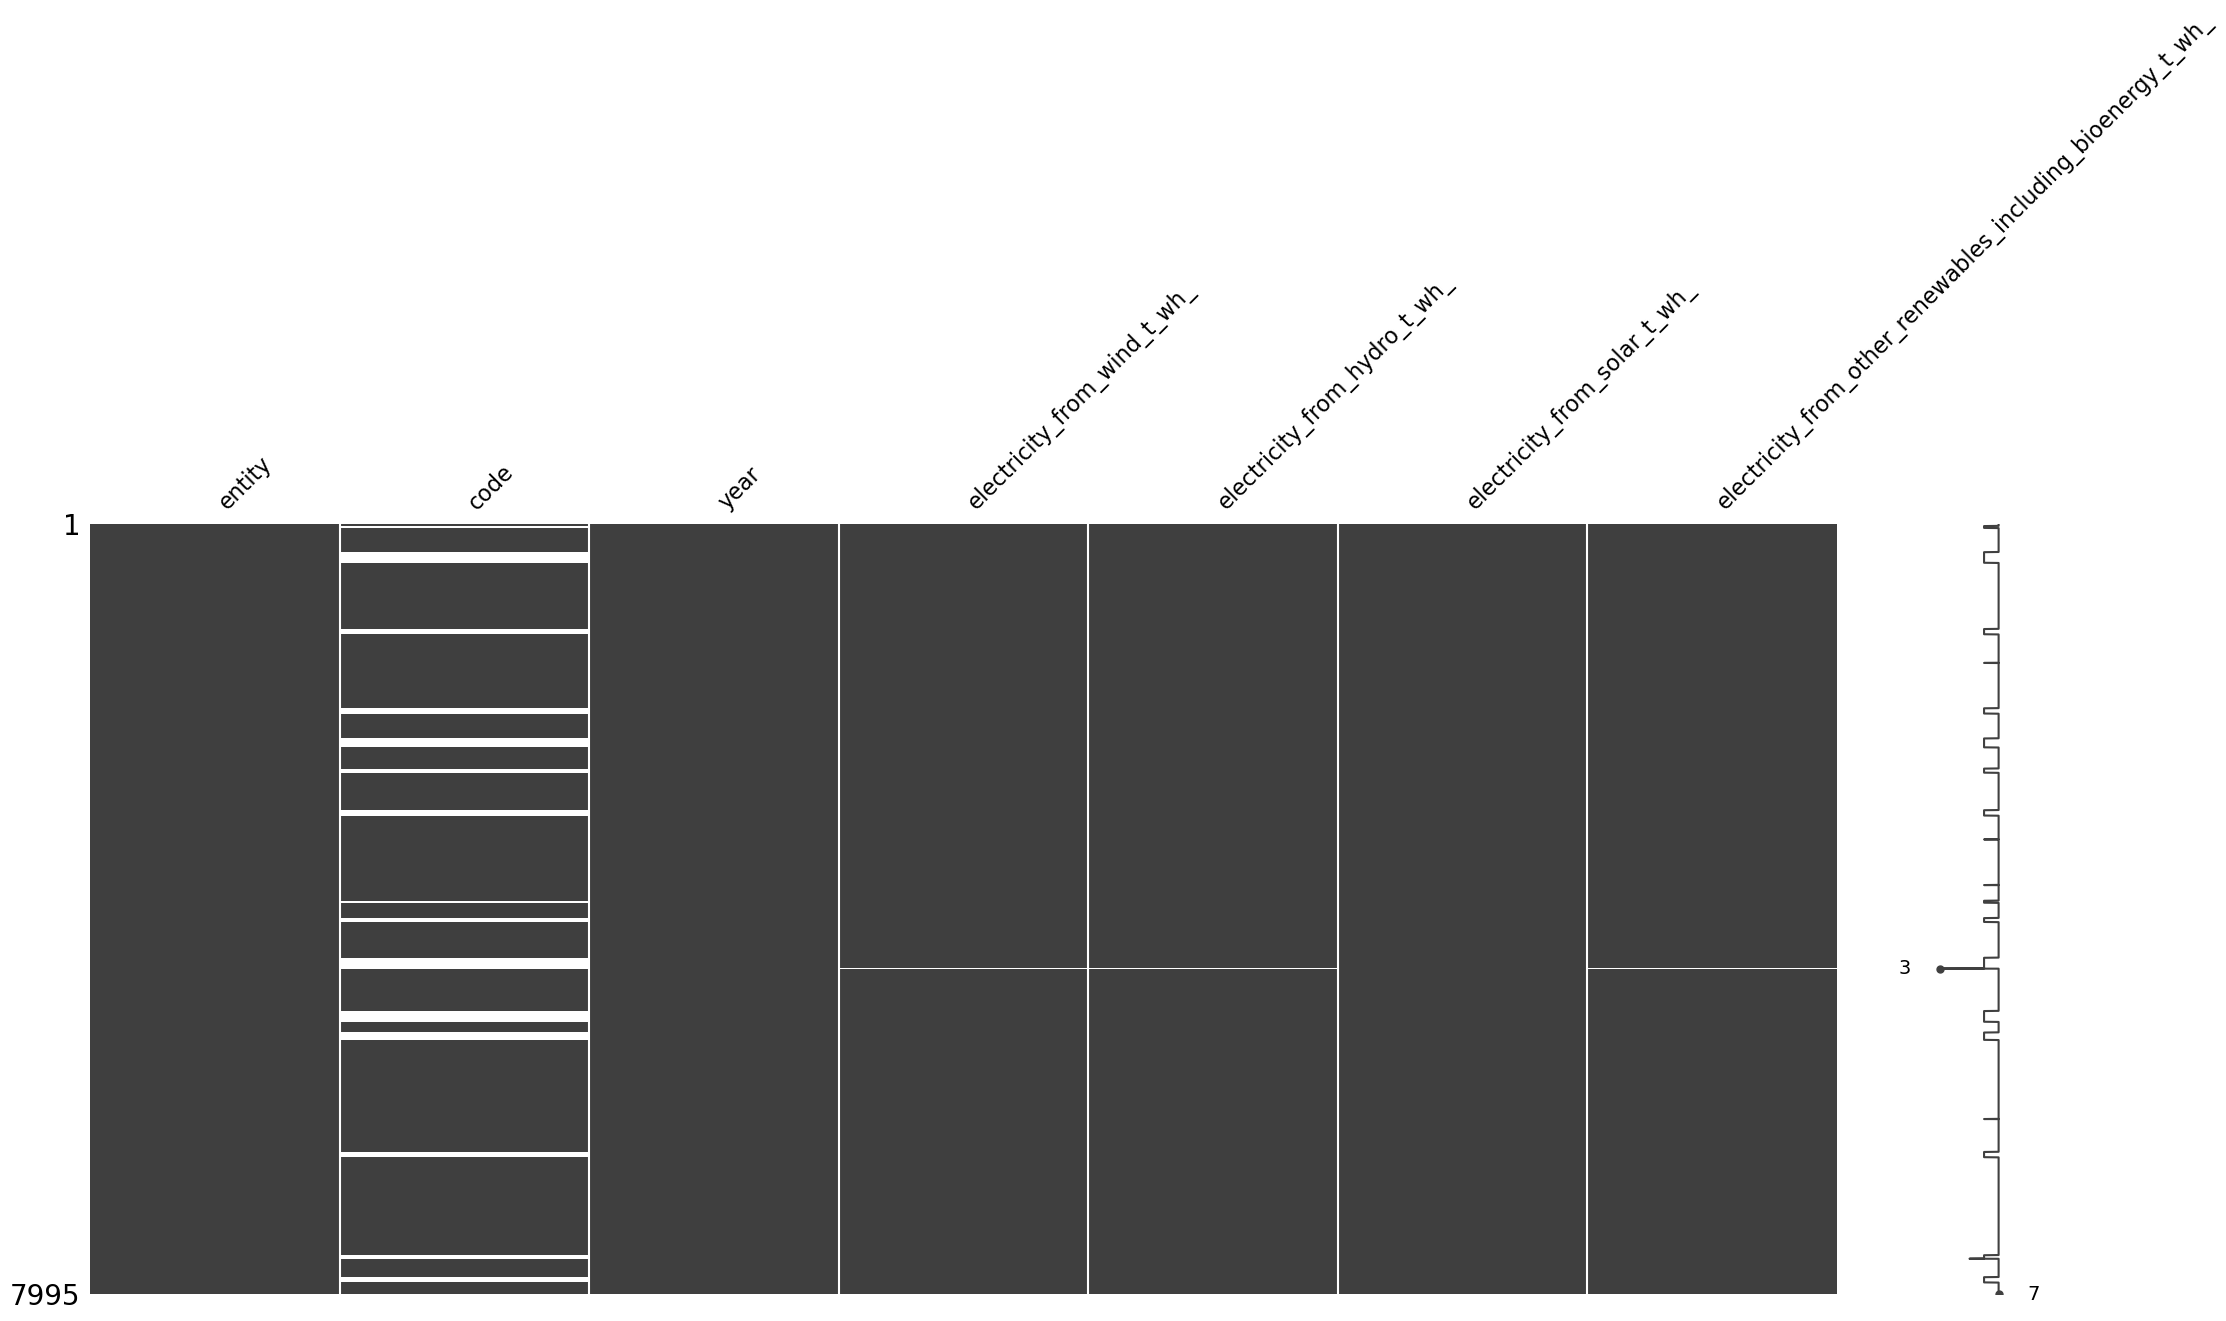

In [12]:
msno.matrix(mprod_df);

`code` has the highest number of missing values, nevertheless, this is attributed to a lack of encoding for a specific entity. For instance, when `entity` == `Africa`, we can not find code. In addition, number of missing are negligible in percent for other variables as can be appreciated in `mprod_df.missing.missing_variable_summary()`

In [13]:
mprod_df[mprod_df.code.isna() == True][["code", "entity"]].groupby("entity").first()

,code
entity,
Africa,None
Asia,None
Asia Pacific,None
CIS,None
Eastern Africa,None
Europe,None
European Union (27),None
G20,None
G7,None


In [14]:
from utils import countries as co

In [15]:
mprod_df["region"] = mprod_df["entity"].apply(
    lambda country: next((r for r, countries in co.regions.items() if country in countries), "Other group/region")
)

### 3. Descriptive analysis using `seaborn`

#### Setting style

In [16]:
font1 = {"family" : "serif", "size" : 20}
font2 = {"family" : "serif", "size" : 10}
palette = ["#01204E", "#028391", "#F6DCAC", "#FEAE6F"]
sns.set_palette(palette=palette)
sns.set_style("ticks")

In [17]:
filtered_df = mprod_df[mprod_df["region"] != "Other group/region"]

Renewable energies are being rapidly adopted worldwide to diminish $CO_{2}$ emissions and cope with other concerning environmental problems. In this regard, a detailed analysis of how are energy transition adapted in each region is undergone. Firstly, to observe if there are outliers which can hinder our statistical analysis, we perform a _boxplot_:

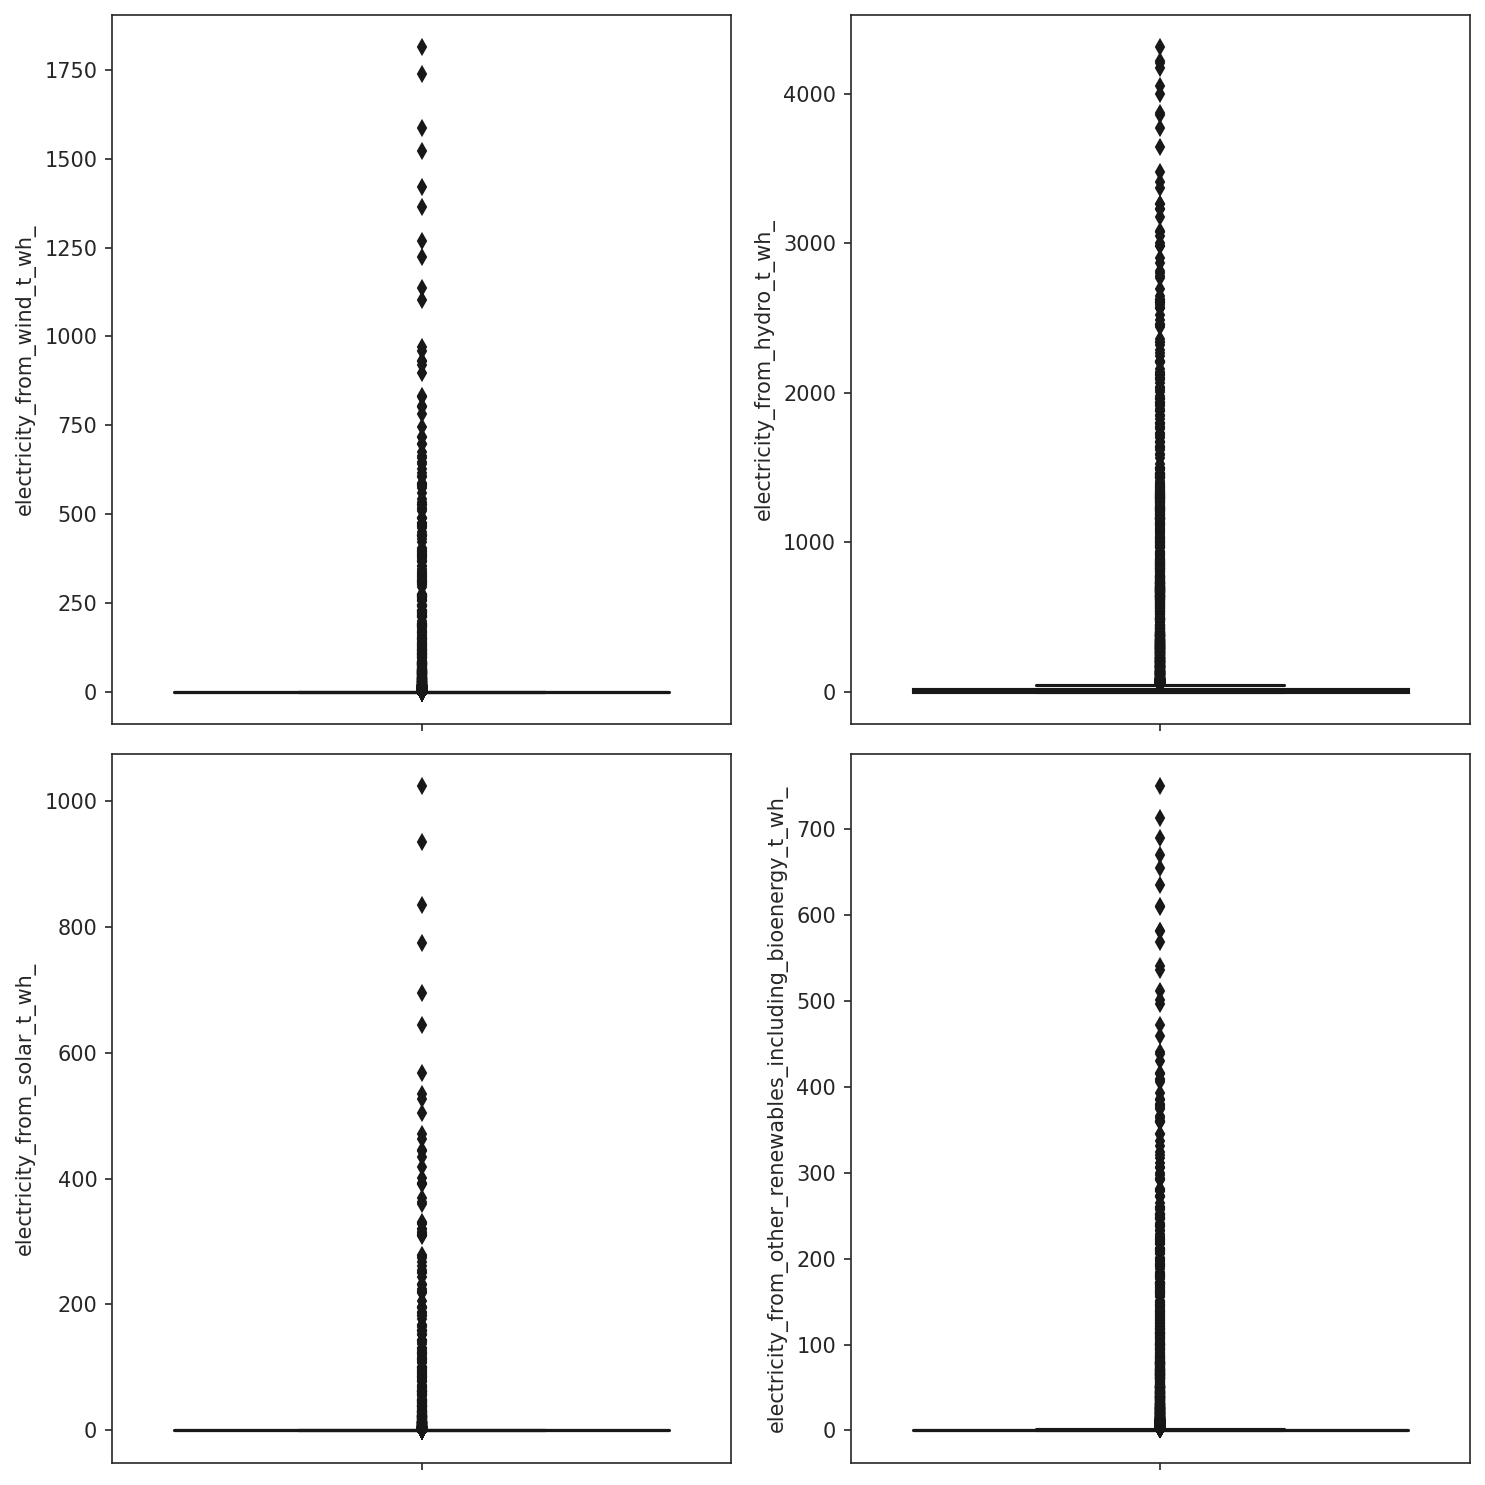

In [18]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), dpi=150)
sns.boxplot(data=mprod_df, y="electricity_from_wind_t_wh_", showfliers=True, ax=axis.flat[0])
sns.boxplot(data=mprod_df, y="electricity_from_hydro_t_wh_", showfliers=True, ax=axis.flat[1])
sns.boxplot(data=mprod_df, y="electricity_from_solar_t_wh_", showfliers=True, ax=axis.flat[2])
sns.boxplot(data=mprod_df, y="electricity_from_other_renewables_including_bioenergy_t_wh_", showfliers=True, ax=axis.flat[3])
plt.tight_layout()
plt.show()

By a _histogram_ of each form of electricity production, we can deduce that distribution is highly biased to lower values. Outliers presented in above boxplots just exhibit very large plant that are far away from mean typical production worldwide.

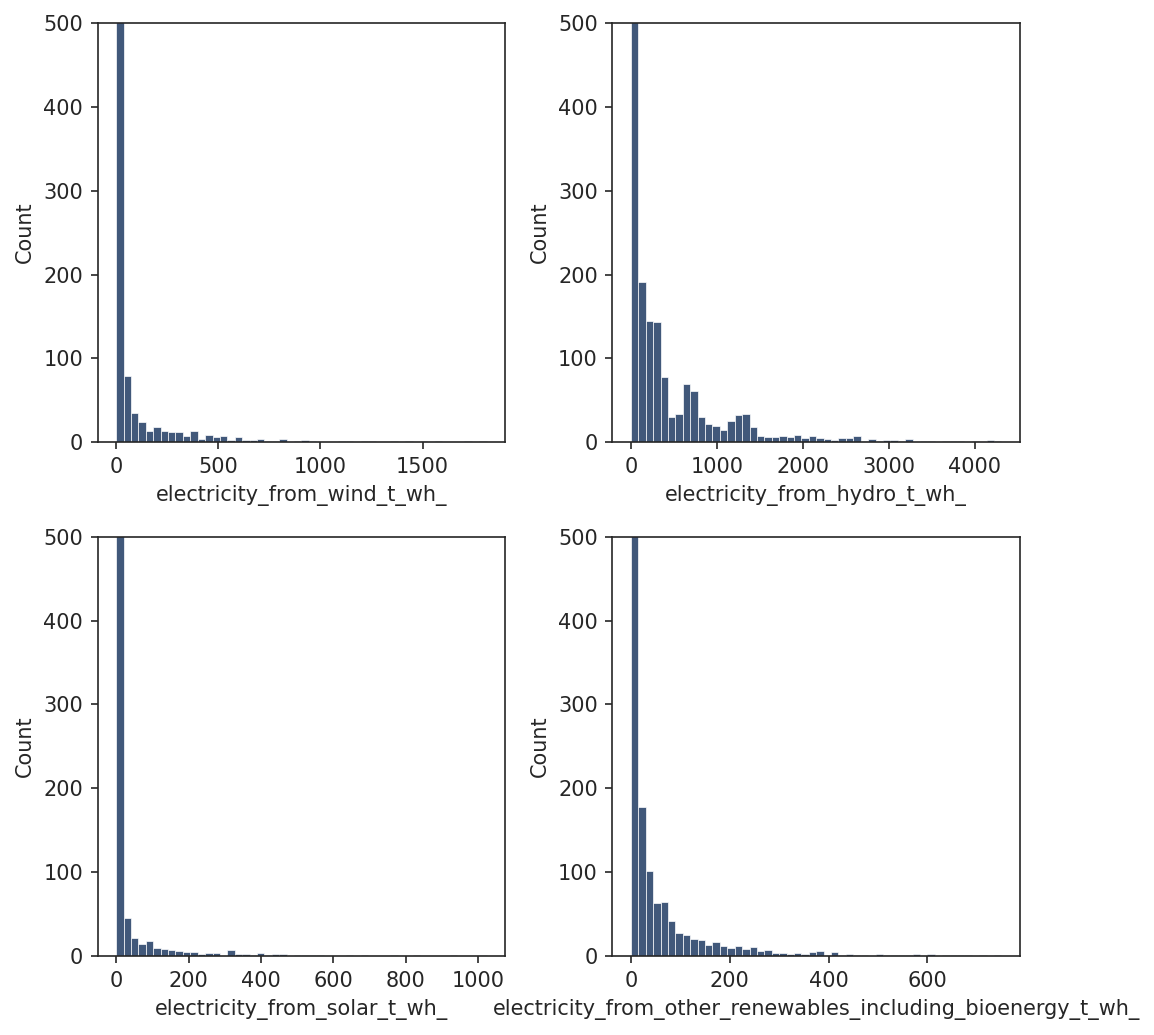

In [19]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(7, 7), dpi=150)
sns.histplot(data=mprod_df, x="electricity_from_wind_t_wh_", ax=axis.flat[0], bins=50)
sns.histplot(data=mprod_df, x="electricity_from_hydro_t_wh_", ax=axis.flat[1], bins=50)
sns.histplot(data=mprod_df, x="electricity_from_solar_t_wh_", ax=axis.flat[2], bins=50)
sns.histplot(data=mprod_df, x="electricity_from_other_renewables_including_bioenergy_t_wh_", ax=axis.flat[3], bins=50)
for ax in axis.flat:
    ax.set_ylim(0, 500) # A 15% of scale
plt.tight_layout()
plt.show()

If we reject outliers in boxplots, we can discover interesting relationships between electricity production from renewables by region. There are regions that domain certain type of renewables, as it is the case of _South America_ for **hydropower**, _North America_ for **solar power**, and _Europe_ for **wind**. Regions like Africa are shifting to renewables from a recent time:

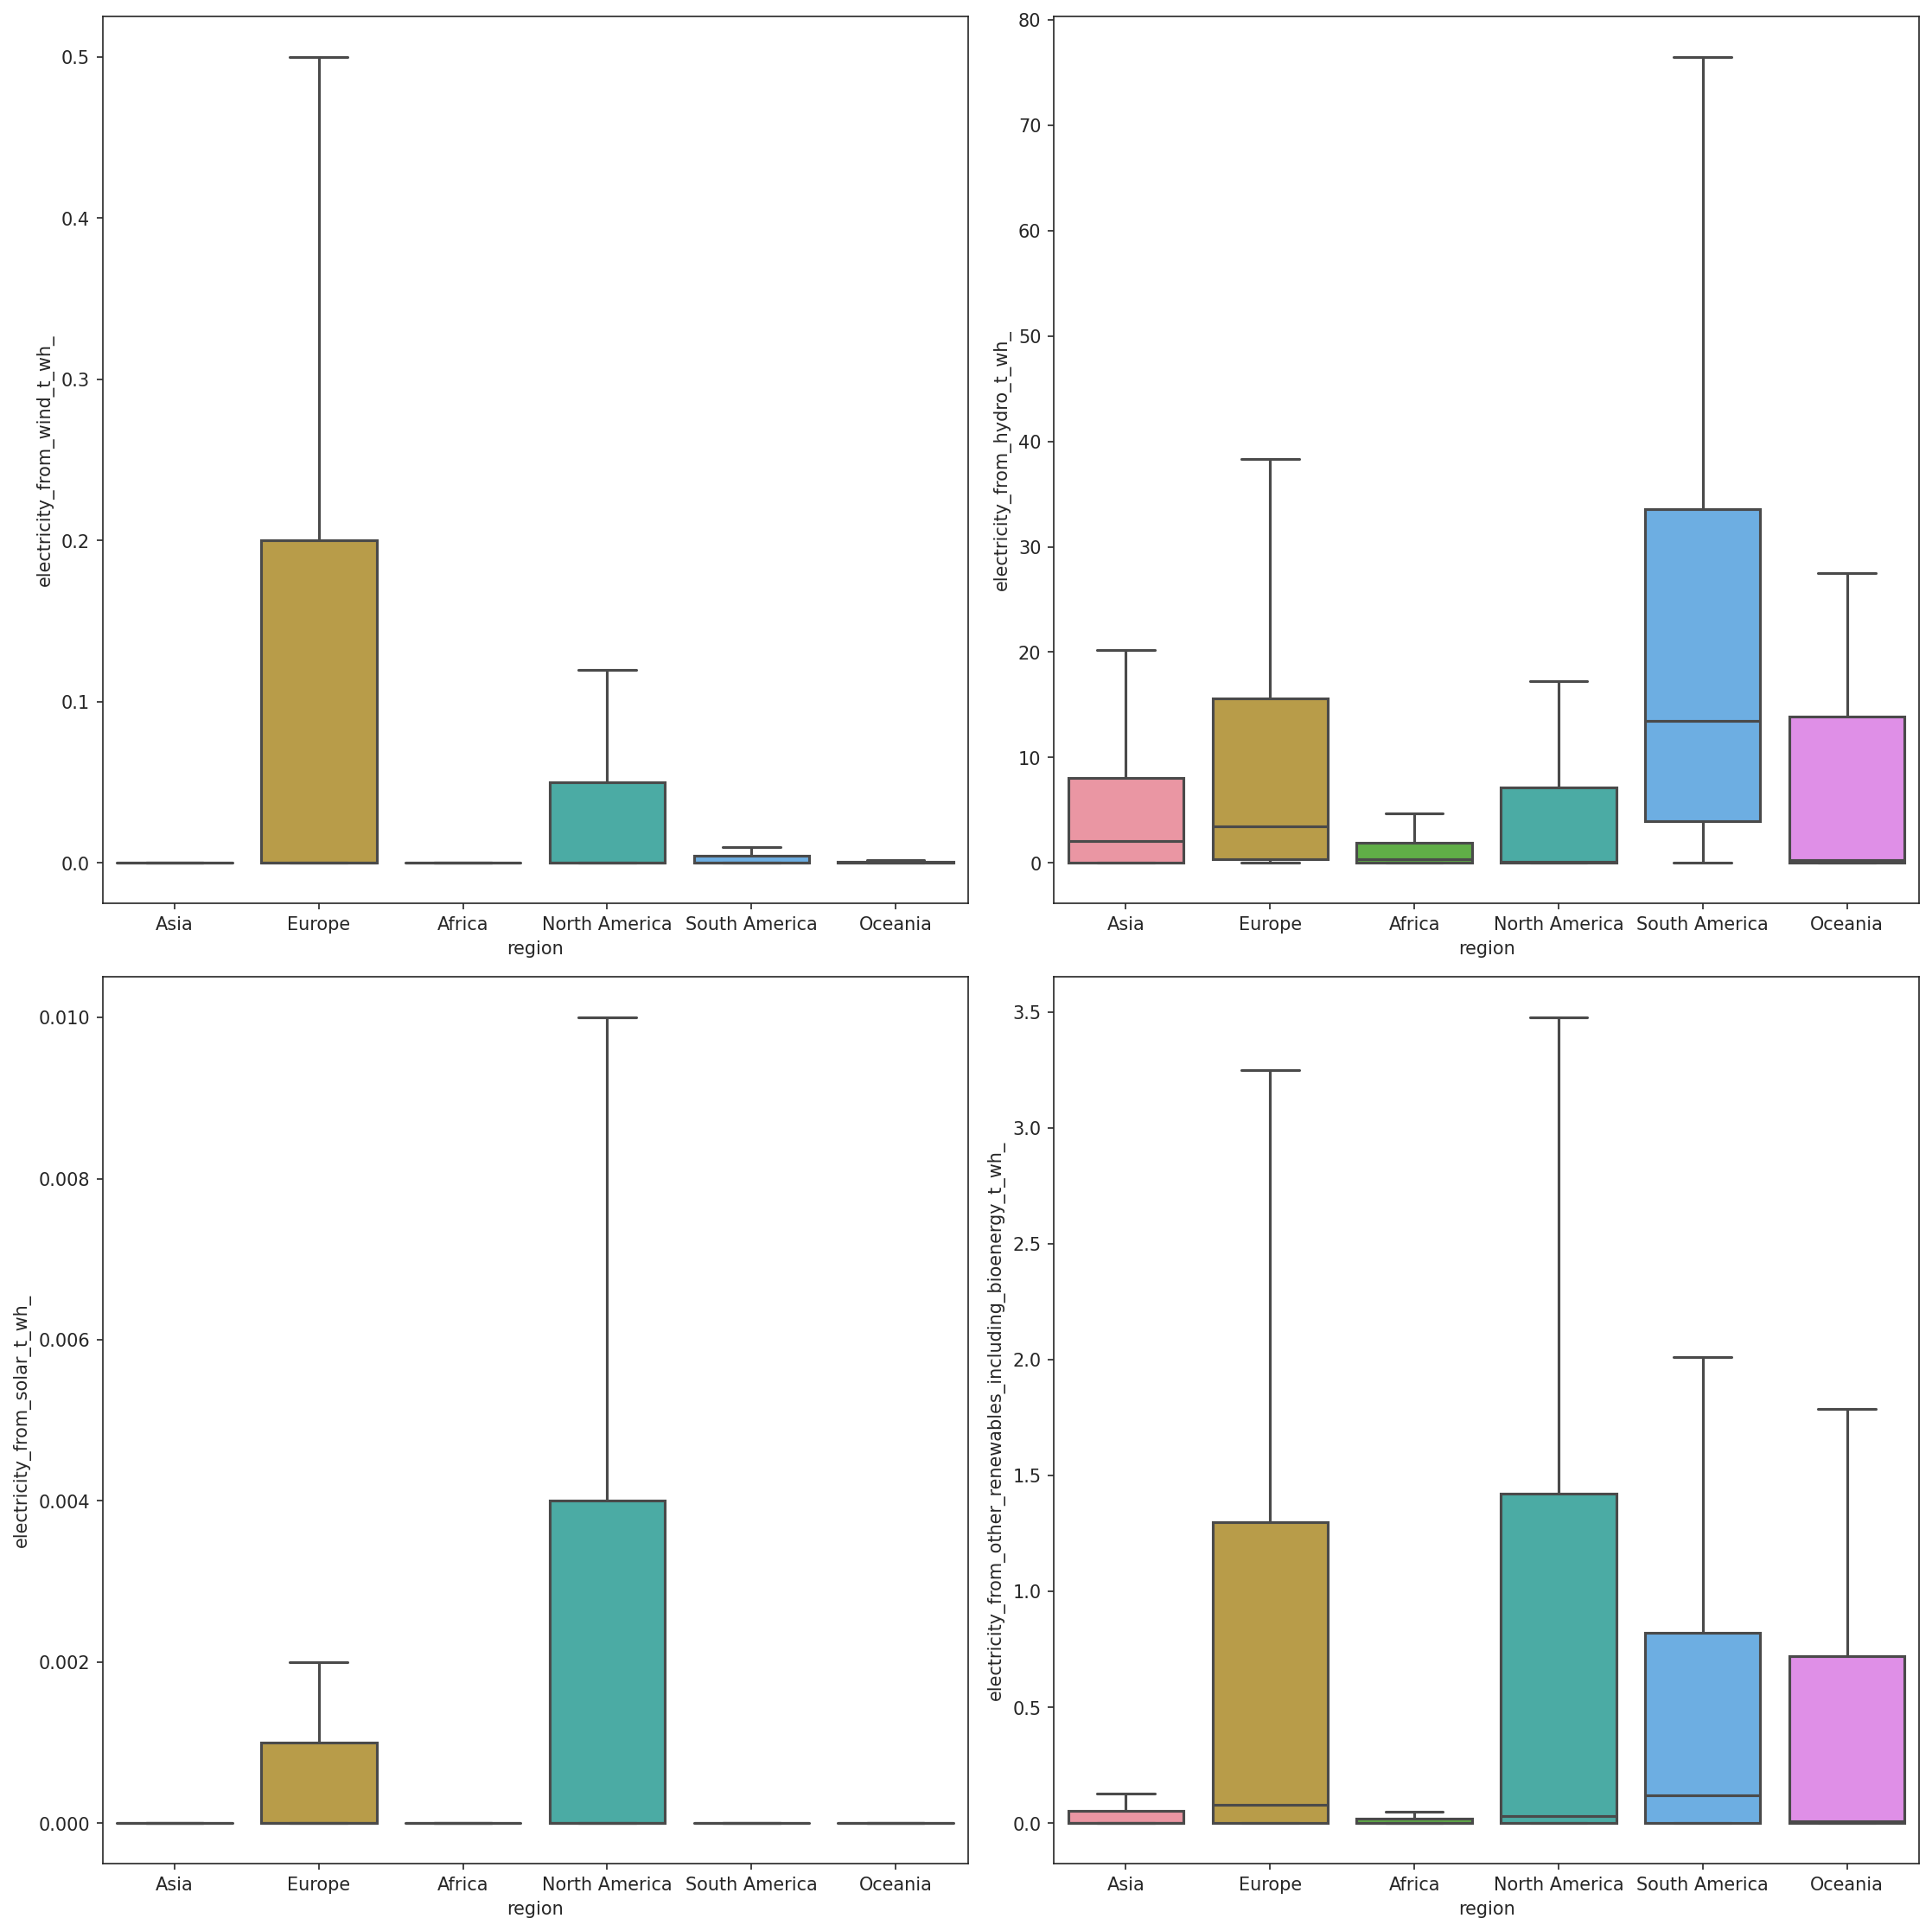

In [20]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15, 15), dpi=150)
sns.boxplot(data=filtered_df, y="electricity_from_wind_t_wh_", showfliers=False, ax=axis.flat[0], x="region")
sns.boxplot(data=filtered_df, y="electricity_from_hydro_t_wh_", showfliers=False, ax=axis.flat[1], x="region")
sns.boxplot(data=filtered_df, y="electricity_from_solar_t_wh_", showfliers=False, ax=axis.flat[2], x="region")
sns.boxplot(data=filtered_df, y="electricity_from_other_renewables_including_bioenergy_t_wh_", showfliers=False, ax=axis.flat[3], x="region")
plt.tight_layout()
plt.show()

We can observe some relationships among forms of electricity production, typically in the world, if territory is rich in other renewables as bioenergy, there's a correlation to possess notable production in wind ($\sigma_{xy} = 0.95$), solar plants ($\sigma_{xy} = 0.78$), and hydro power ($\sigma_{xy} = 0.86$).

In [21]:
corr = mprod_df.corr(numeric_only=True)

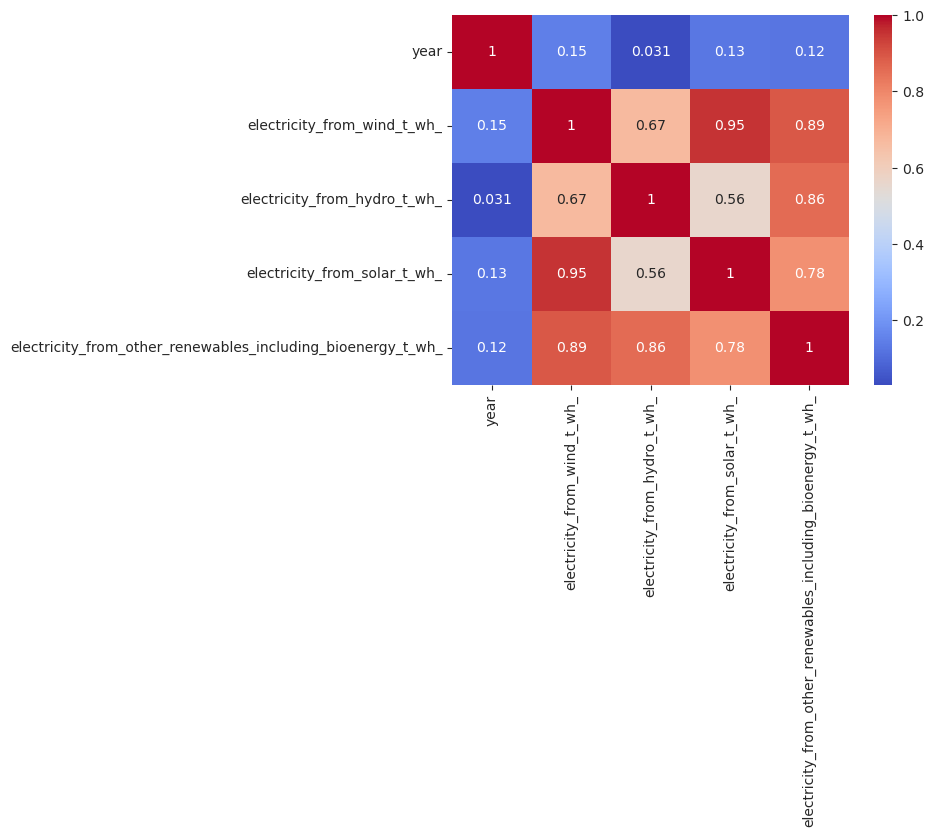

In [22]:
sns.heatmap(data=corr, cbar=True, cmap="coolwarm", annot=True)
plt.show()

In general, renewables are growing at a rapid pace around the world, but this behavior is stronger for solar and wind, which are shooting up specially in Asia and North America, respectively.

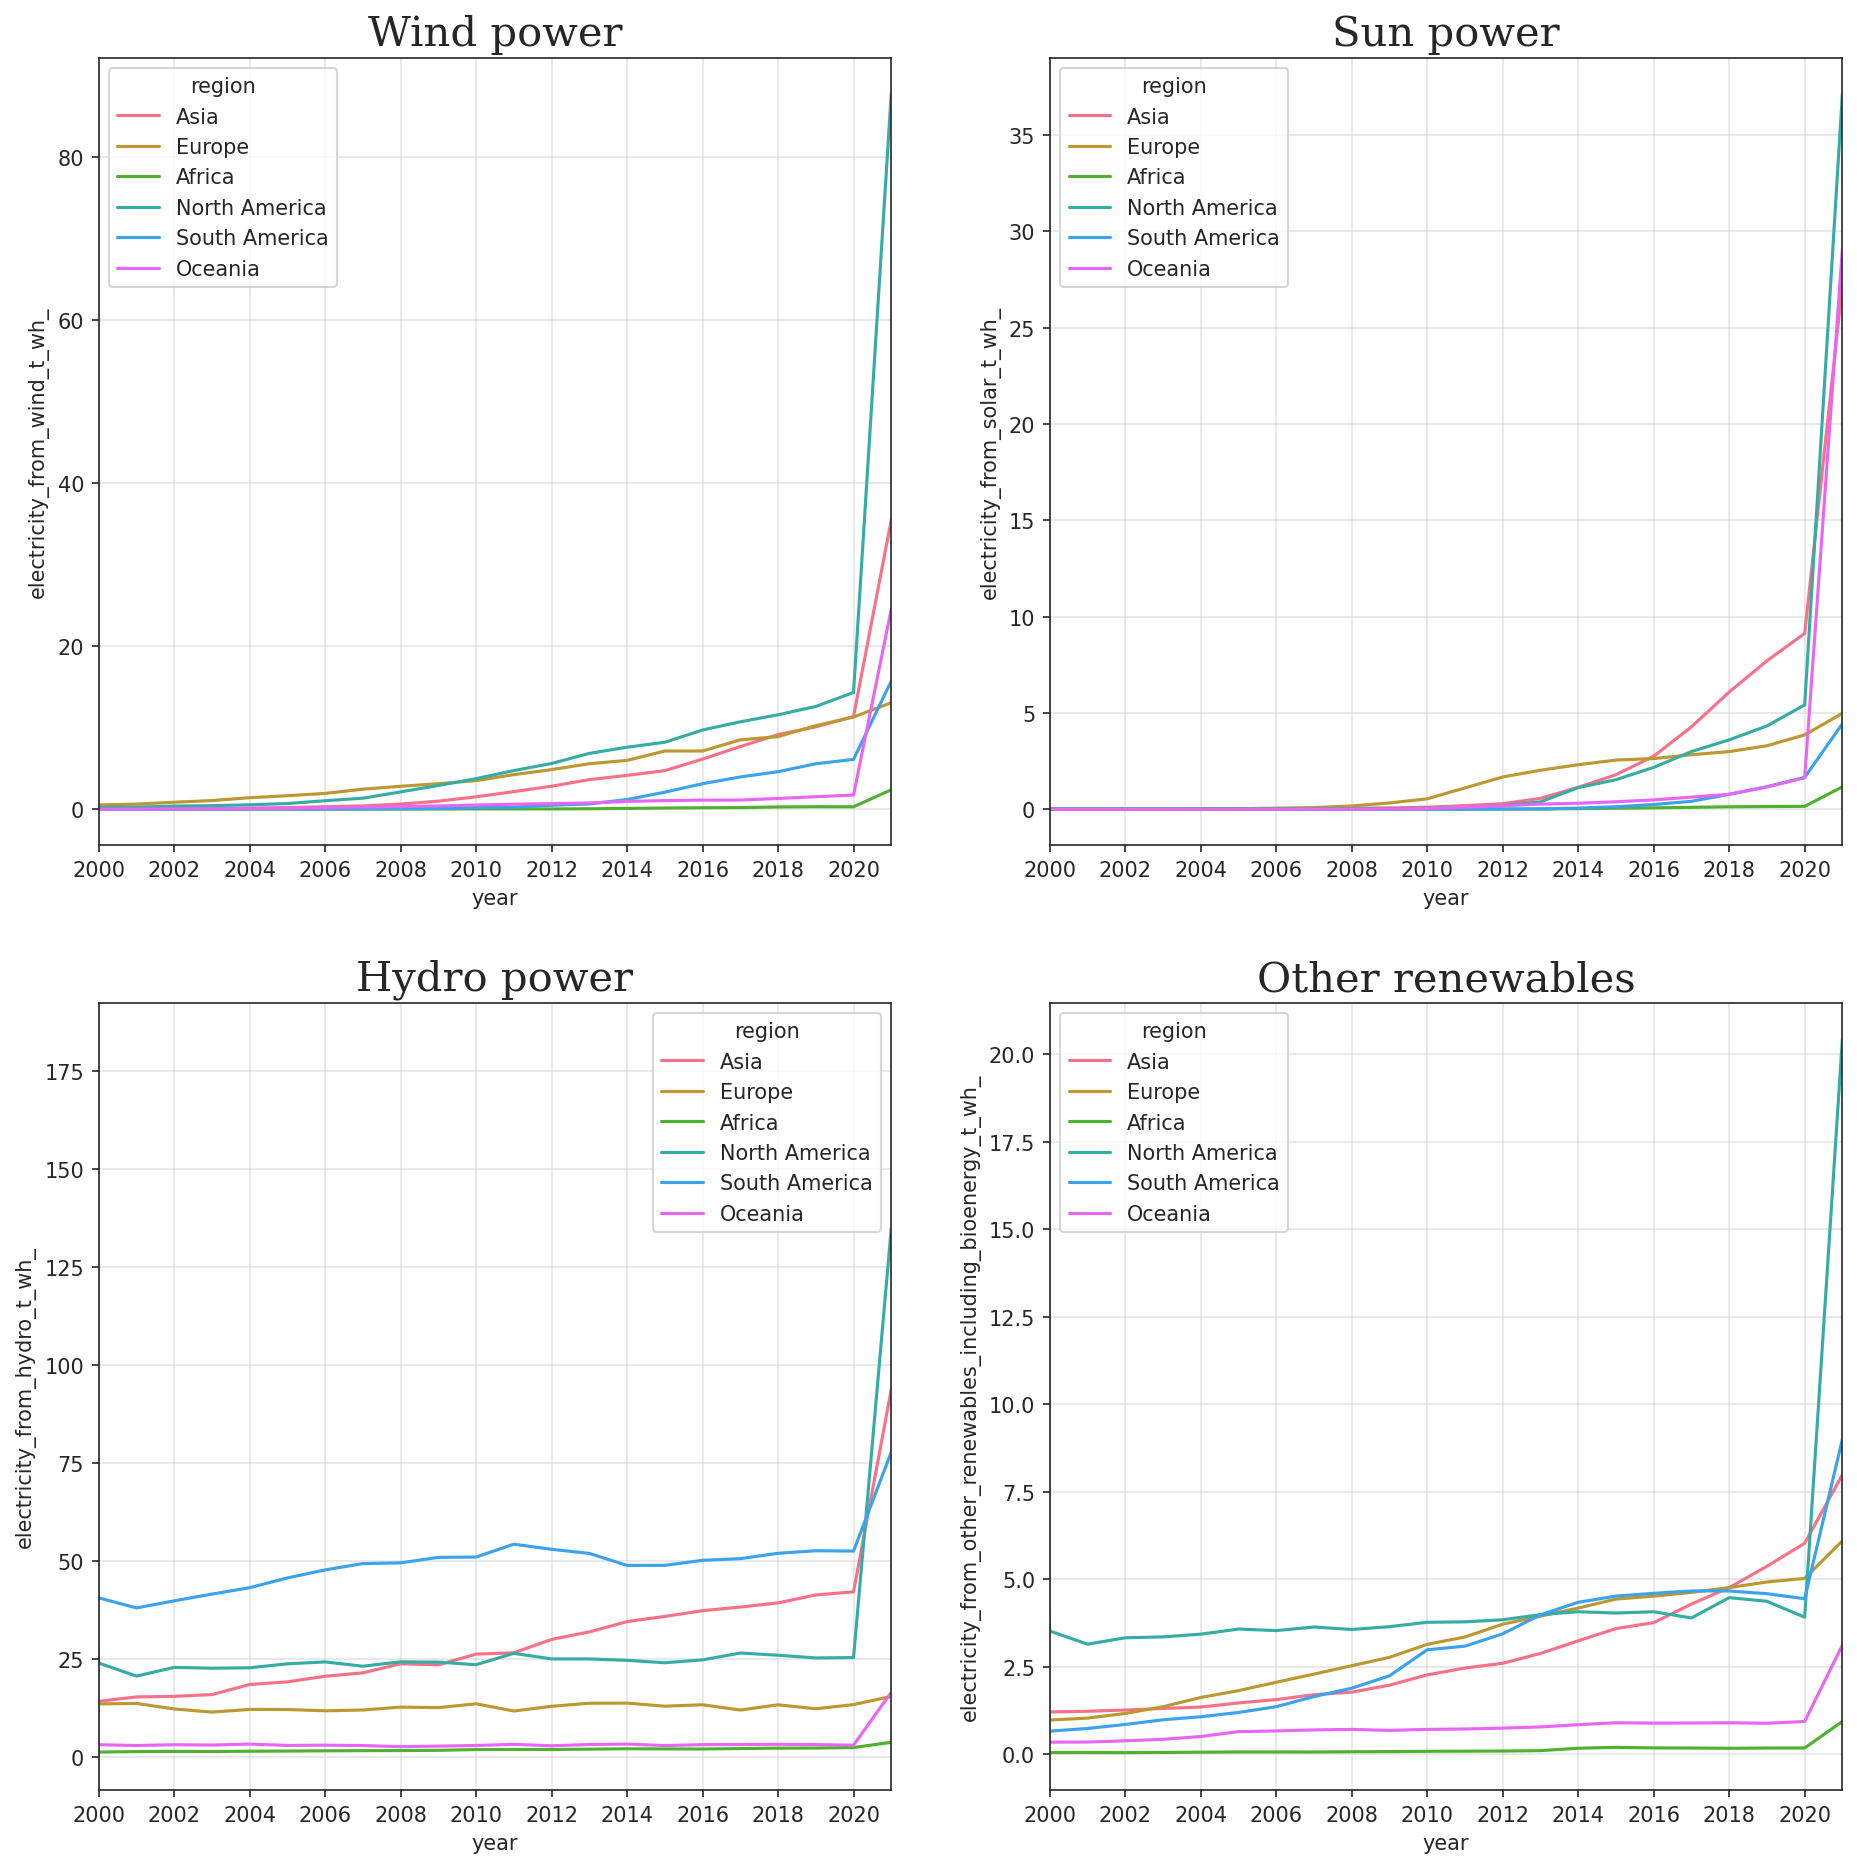

In [23]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15,15), dpi=150)
lines1 = sns.lineplot(data=filtered_df, x="year", y="electricity_from_wind_t_wh_", hue="region", errorbar=None, ax=axis.flat[0], markers=["o"])
axis.flat[0].set_title("Wind power", fontdict=font1)
lines2 = sns.lineplot(data=filtered_df, x="year", y="electricity_from_solar_t_wh_", hue="region", errorbar=None, ax=axis.flat[1], markers=True)
axis.flat[1].set_title("Sun power", fontdict=font1)
lines3 = sns.lineplot(data=filtered_df, x="year", y="electricity_from_hydro_t_wh_", hue="region", errorbar=None, ax=axis.flat[2], markers=True)
axis.flat[2].set_title("Hydro power", fontdict=font1)
lines4 = sns.lineplot(data=filtered_df, x="year", y="electricity_from_other_renewables_including_bioenergy_t_wh_", hue="region", errorbar=None, ax=axis.flat[3])
axis.flat[3].set_title("Other renewables", fontdict=font1)
labels = [str(x) for x in np.arange(2000, 2021, 2)]
for ax in axis.flat:
    ax.set_xlim(2000, 2021)
    ax.set_xticks(ticks=np.arange(2000, 2021, 2), labels=labels)
    ax.grid(alpha=0.5)
plt.show()

In [24]:
# -- SELECT SUM(`Electricity from Wind (TWh)`) AS wind, SUM(`Electricity from solar (TWh)`) AS solar, SUM(`Electricity from hydro (TWh)`) AS hydro, SUM(`Electricity from other renewables including bioenergy (TWh)`) AS other_renewables_including_bioenergy, `Year` AS year, `Region` as region --
# -- FROM production
# -- WHERE `Region` LIKE "%South%"
# -- GROUP BY `Year`, `Region`;

In [25]:
region_df = filtered_df.groupby(by=["year", "region"])[["region", "electricity_from_solar_t_wh_", "electricity_from_wind_t_wh_", "electricity_from_hydro_t_wh_", "electricity_from_other_renewables_including_bioenergy_t_wh_"]].sum(numeric_only=True)
region_df

electricity_from_solar_t_wh_  electricity_from_wind_t_wh_  \
year region                                                                     
1965 Africa                                 0.00                         0.00   
     Asia                                   0.00                         0.00   
     Europe                                 0.00                         0.00   
     North America                          0.00                         0.00   
     Oceania                                0.00                         0.00   
...                                          ...                          ...   
2021 Asia                                 571.79                       745.56   
     Europe                               179.47                       470.52   
     North America                        185.85                       439.06   
     Oceania                               29.12                        24.56   
     South America                         26.65                        94.39   

                    electricity_from_hydro_t_wh_  \
year region                                        
1965 Africa                                3.382   
     Asia                                132.303   
     Europe                              290.608   
     North America                       325.925   
     Oceania                              17.709   
...                                          ...   
2021 Asia                               1971.270   
     Europe                              560.660   
     North America                       674.880   
     Oceania                              16.630   
     South America                       467.200   

                    electricity_from_other_renewables_including_bioenergy_t_wh_  
year region                                                                      
1965 Africa                                                     0.000            
     Asia                                                       0.100            
     Europe                                                     2.909            
     North America                                             13.332            
     Oceania                                                    1.644            
...                                                               ...            
2021 Asia                                                     135.790            
     Europe                                                   219.490            
     North America                                            102.250            
     Oceania                                                    3.120            
     South America                                             54.030            

[342 rows x 4 columns]

In [40]:
region_sql_df = pd.read_csv("./data/modern_prod_by_year_region.csv").rename(columns={"other_renewables_including_bioenergy" : "other"})
region_sql_df[region_sql_df.year < 2020].corr(numeric_only=True)

,wind,solar,hydro,other,year
wind,1.000000,0.883907,0.559693,0.869627,0.575394
solar,0.883907,1.000000,0.545625,0.740927,0.448471
hydro,0.559693,0.545625,1.000000,0.763282,0.273711
other,0.869627,0.740927,0.763282,1.000000,0.490769
year,0.575394,0.448471,0.273711,0.490769,1.000000


In [41]:
asia_corr_1990_2019 = region_sql_df[(region_sql_df.region == "Asia") & (region_sql_df.year < 2020)].corr(numeric_only=True)
europe_corr_1990_2019 = region_sql_df[(region_sql_df.region == "Europe") & (region_sql_df.year < 2020)].corr(numeric_only=True)
africa_corr_1990_2019 = region_sql_df[(region_sql_df.region == "Africa") & (region_sql_df.year < 2020)].corr(numeric_only=True)
oceania_corr_1990_2019 = region_sql_df[(region_sql_df.region == "Oceania") & (region_sql_df.year < 2020)].corr(numeric_only=True)
north_america_corr_1990_2019 = region_sql_df[(region_sql_df.region == "North America") & (region_sql_df.year < 2020)].corr(numeric_only=True)
south_america_corr_1990_2019 = region_sql_df[(region_sql_df.region == "South America") & (region_sql_df.year < 2020)].corr(numeric_only=True)

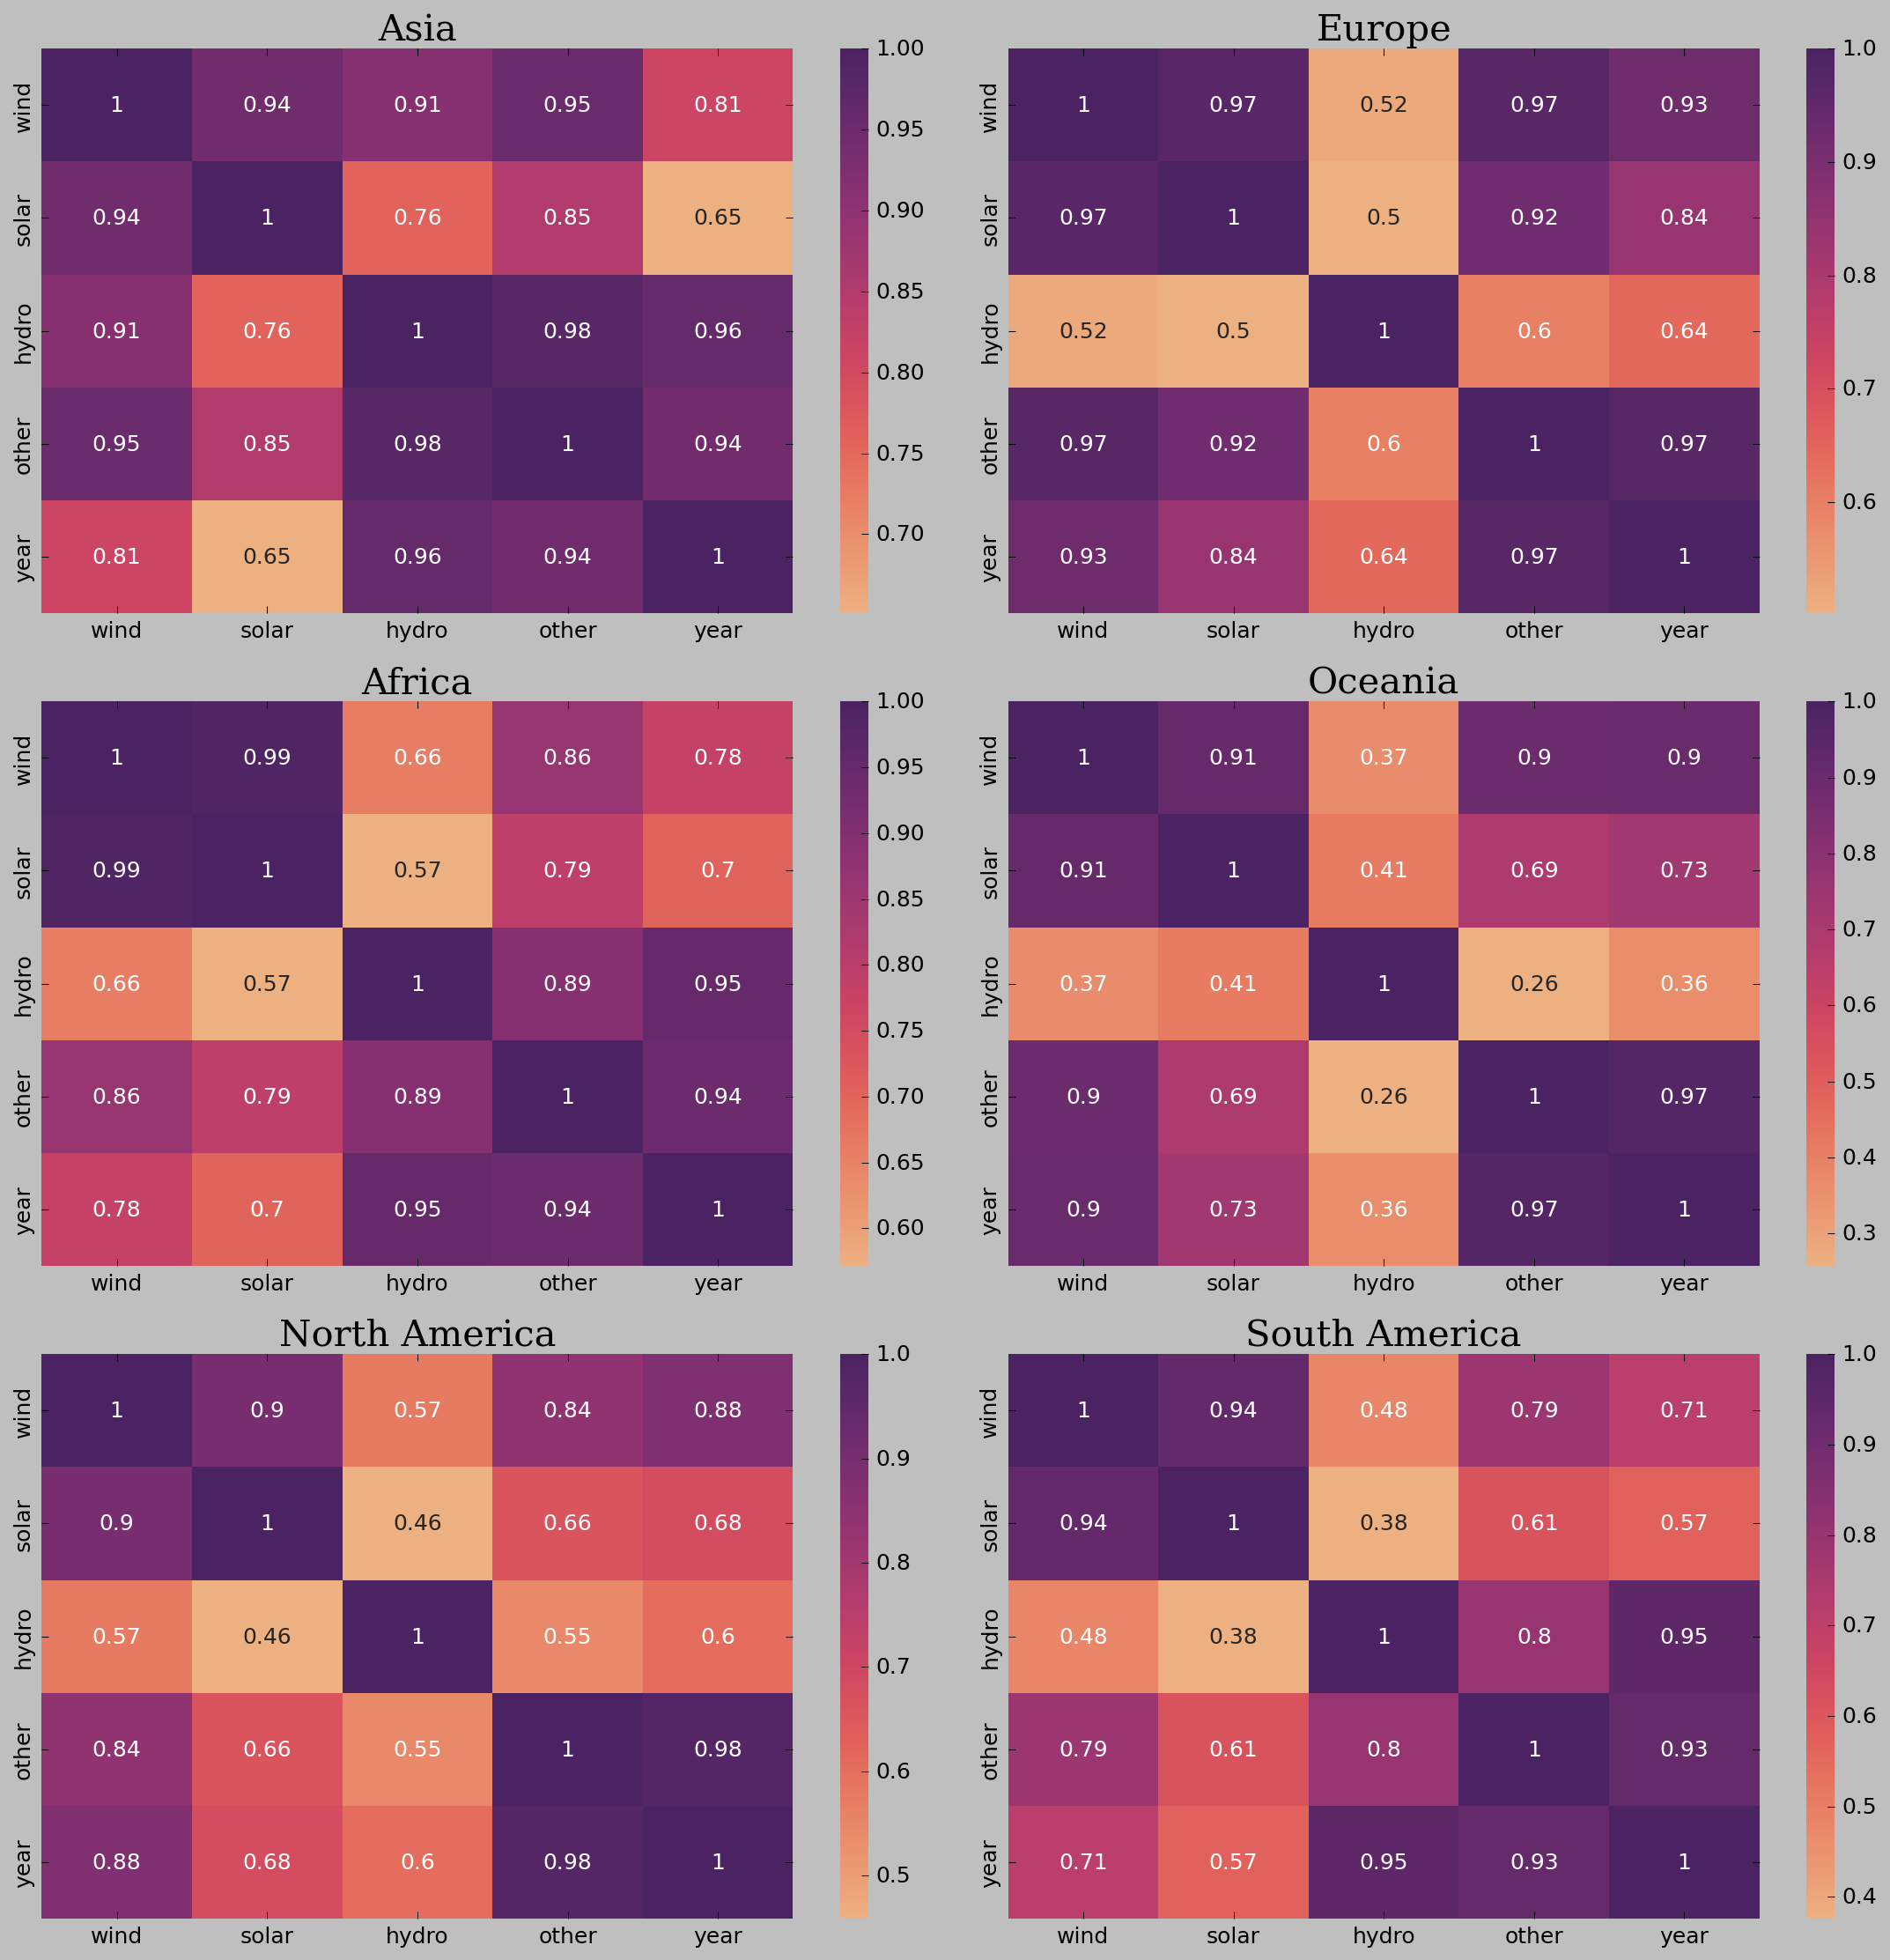

In [42]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15), dpi=150)
sns.heatmap(data=asia_corr_1990_2019, cbar=True, cmap="flare", annot=True, ax=axes.flat[0])
axes.flat[0].set_title("Asia", fontdict=font1)
sns.heatmap(data=europe_corr_1990_2019, cbar=True, cmap="flare", annot=True, ax=axes.flat[1])
axes.flat[1].set_title("Europe", fontdict=font1)
sns.heatmap(data=africa_corr_1990_2019, cbar=True, cmap="flare", annot=True, ax=axes.flat[2])
axes.flat[2].set_title("Africa", fontdict=font1)
sns.heatmap(data=oceania_corr_1990_2019, cbar=True, cmap="flare", annot=True, ax=axes.flat[3])
axes.flat[3].set_title("Oceania", fontdict=font1)
sns.heatmap(data=north_america_corr_1990_2019, cbar=True, cmap="flare", annot=True, ax=axes.flat[4])
axes.flat[4].set_title("North America", fontdict=font1)
sns.heatmap(data=south_america_corr_1990_2019, cbar=True, cmap="flare", annot=True, ax=axes.flat[5])
axes.flat[5].set_title("South America", fontdict=font1)
plt.tight_layout()
plt.show()

Within the period 1990-2019, we could observe a notable growth of renewable energies through time being more even for Europe, excepting for hydro power, due to their lack of this resource.

North America are one of the largest $CO_{2}$ emitting regions, we will try to predict the amount of TWh produced by sun power and other renewable sources for 2030.

## 4. Training models

By this method, a quick linear regression can be made, but to observe more details as fitting metrics and other ways to optimized the linear model, it is recommendable to use `train_test_split`

#### 4.1 Predicting sun power

In [44]:
# Sun power growth for North America
predict_northam = region_sql_df[(region_sql_df.region == "North America") & (region_sql_df.year < 2020)]
X = predict_northam["year"].values.reshape(-1,1)
Y = predict_northam["solar"].values.reshape(-1,1)

In [45]:
# Normalizing values
X_sc = StandardScaler()
Y_sc = StandardScaler()

X_std = X_sc.fit_transform(X)
Y_std = Y_sc.fit_transform(Y)

# Training model
slr = LinearRegression()
slr.fit(X_std, Y_std)

LinearRegression()

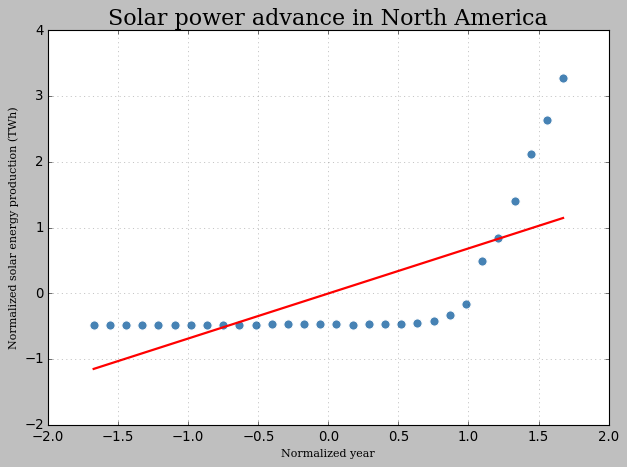

In [49]:
lm.lin_regplot(X_std, Y_std, slr)
plt.title("Solar power advance in North America", fontdict=font1)
plt.ylabel("Normalized solar energy production (TWh)", fontdict=font2)
plt.xlabel("Normalized year", fontdict=font2)
plt.tight_layout()
plt.grid(alpha=0.4)
plt.show()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=123 # It takes 30% of the sample to train the model
)

In [59]:
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(Y)

# Normalizing
X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

# Training model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [60]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print("r2: ", r2.round(4))

MSE: 1.27
r2:  0.3117


There is a remarkable growth in sun power production in North America, according to scatterplot this growth is being exponentially in last recent years. This boom can not be modelled accurately by our linear model, as metrics showed up a poor performance: $R^{2} = 0.3117$.

In [62]:
# lm.LinearModel.multl_model("solar")

AttributeError: 'DataFrame' object has no attribute 'lm'